# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
# Import API key
from config import weather_api_key
import scipy.stats as st

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Using OpenWeatherMap Direct Geocoding API
# Using For Loop to loop through cities
# Using a try/except block to determine which cities are found and not found
# storing the cities that are found in a list
# creating a dataframe with the information from the cities that are found
# print(cities)
# api call
# http://api.openweathermap.org/geo/1.0/direct?q={city}&limit={limit}&appid={API key}
url = 'http://api.openweathermap.org/geo/1.0/direct?q='
limit = 1
api_key = weather_api_key

weather_dict = {
    'city': cities,
    'lat': "",
    'lng': "",
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

for city in cities:
    query_url = f'{url}{city}&limit={limit}&appid={api_key}'
    response = requests.get(query_url).json()
#     pprint(response)
    try:
        weather_df.loc[weather_df['city'] == city, 'lat'] = response[0]['lat']
        weather_df.loc[weather_df['city'] == city, 'lng'] = response[0]['lon']
        print(f'{city} found: processing data')
    except:
        print('City not found')
        pass


new norfolk found: processing data
City not found
hobart found: processing data
ca mau found: processing data
sayat found: processing data
rikitea found: processing data
jamestown found: processing data
faanui found: processing data
carauari found: processing data
sohag found: processing data
souillac found: processing data
bengkulu found: processing data
hofn found: processing data
dikson found: processing data
cayenne found: processing data
umm durman found: processing data
namwala found: processing data
saint george found: processing data
castro found: processing data
norman wells found: processing data
sola found: processing data
barentsburg found: processing data
kargasok found: processing data
qaanaaq found: processing data
tuatapere found: processing data
butaritari found: processing data
buta found: processing data
thompson found: processing data
mataura found: processing data
mahebourg found: processing data
port alfred found: processing data
batagay found: processing data
bus

constitucion found: processing data
shasta lake found: processing data
guerrero negro found: processing data
pirenopolis found: processing data
pevek found: processing data
City not found
saint-pierre found: processing data
evensk found: processing data
elizabeth city found: processing data
marcona found: processing data
palauig found: processing data
ponta delgada found: processing data
nome found: processing data
manturovo found: processing data
tilichiki found: processing data
aklavik found: processing data
City not found
mafinga found: processing data
port hedland found: processing data
qasigiannguit found: processing data
City not found
havoysund found: processing data
zhezkazgan found: processing data
waingapu found: processing data
barra patuca found: processing data
dingle found: processing data
avera found: processing data
bauchi found: processing data
kavieng found: processing data
sistranda found: processing data
turbiv found: processing data
victoria point found: processing

brownsville found: processing data
fare found: processing data
ellisras found: processing data
sarasota springs found: processing data
smithers found: processing data
bhikangaon found: processing data
omsukchan found: processing data
naze found: processing data
sinnamary found: processing data
nuuk found: processing data
villa carlos paz found: processing data
sorong found: processing data
forrest city found: processing data
City not found
bababe found: processing data
san luis found: processing data
jalu found: processing data
cap malheureux found: processing data
oksfjord found: processing data
upata found: processing data
salinopolis found: processing data
lichuan found: processing data
paveh found: processing data
vostok found: processing data
poya found: processing data
kavaratti found: processing data
sidney found: processing data
City not found
maua found: processing data
launceston found: processing data
muisne found: processing data
calabar found: processing data
garowe found:

In [4]:
weather_df.head()

city      lat      lng
0  new norfolk -42.7802  147.062
1     tumannyy                  
2       hobart -42.8825  147.328
3       ca mau  9.17922  105.146
4        sayat  45.8273  3.05102

In [5]:
weather_df['max temperature'] = ""
weather_df['humidity'] = ""
weather_df['cloudiness'] = ""
weather_df['wind speed'] = ""
weather_df['country'] = ""
weather_df['date'] = ""
weather_df.head()

city      lat      lng max temperature humidity cloudiness  \
0  new norfolk -42.7802  147.062                                       
1     tumannyy                                                         
2       hobart -42.8825  147.328                                       
3       ca mau  9.17922  105.146                                       
4        sayat  45.8273  3.05102                                       

  wind speed country date  
0                          
1                          
2                          
3                          
4

In [6]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}&units=imperial
units = 'imperial'
weather_url = 'https://api.openweathermap.org/data/2.5/weather?lat='

for city in cities:
    lat = weather_df.loc[weather_df['city'] == city, 'lat'].values[0]
    lon = weather_df.loc[weather_df['city'] == city, 'lng'].values[0]
    weather_query = f'{weather_url}{lat}&lon={lon}&appid={api_key}&units={units}'
    weather_response = requests.get(weather_query).json()
    
    try:
        weather_df.loc[weather_df['city'] == city, 'max temperature'] = weather_response['main']['temp_max']
        weather_df.loc[weather_df['city'] == city, 'humidity'] = weather_response['main']['humidity']
        weather_df.loc[weather_df['city'] == city, 'cloudiness'] = weather_response['clouds']['all']
        weather_df.loc[weather_df['city'] == city, 'wind speed'] = weather_response['wind']['speed']
        weather_df.loc[weather_df['city'] == city, 'country'] = weather_response['sys']['country']
        weather_df.loc[weather_df['city'] == city, 'date'] = weather_response['dt']
        print(f'Processing Weather Data For: {city}')
    except:
        print('No Data Reported')
        pass


Processing Weather Data For: new norfolk
No Data Reported
Processing Weather Data For: hobart
Processing Weather Data For: ca mau
Processing Weather Data For: sayat
Processing Weather Data For: rikitea
Processing Weather Data For: jamestown
Processing Weather Data For: faanui
Processing Weather Data For: carauari
Processing Weather Data For: sohag
Processing Weather Data For: souillac
Processing Weather Data For: bengkulu
Processing Weather Data For: hofn
Processing Weather Data For: dikson
Processing Weather Data For: cayenne
Processing Weather Data For: umm durman
Processing Weather Data For: namwala
Processing Weather Data For: saint george
Processing Weather Data For: castro
Processing Weather Data For: norman wells
Processing Weather Data For: sola
Processing Weather Data For: barentsburg
Processing Weather Data For: kargasok
Processing Weather Data For: qaanaaq
Processing Weather Data For: tuatapere
Processing Weather Data For: butaritari
Processing Weather Data For: buta
Process

Processing Weather Data For: noumea
Processing Weather Data For: quatre cocos
Processing Weather Data For: falun
Processing Weather Data For: nanning
Processing Weather Data For: desaguadero
Processing Weather Data For: geraldton
Processing Weather Data For: san buenaventura
Processing Weather Data For: miles city
Processing Weather Data For: airai
Processing Weather Data For: victoria
Processing Weather Data For: tortoli
Processing Weather Data For: upernavik
Processing Weather Data For: mao
Processing Weather Data For: kewanee
Processing Weather Data For: prince george
Processing Weather Data For: valparaiso
Processing Weather Data For: dolbeau
Processing Weather Data For: thaton
Processing Weather Data For: ribeira grande
Processing Weather Data For: baruun-urt
Processing Weather Data For: provideniya
Processing Weather Data For: namatanai
Processing Weather Data For: faya
Processing Weather Data For: sakakah
Processing Weather Data For: soyo
Processing Weather Data For: savalou
Pro

Processing Weather Data For: sabzevar
Processing Weather Data For: labuhan
Processing Weather Data For: tabas
Processing Weather Data For: shadrinsk
Processing Weather Data For: rio grande
Processing Weather Data For: gamba
Processing Weather Data For: gizo
Processing Weather Data For: mariental
Processing Weather Data For: champerico
Processing Weather Data For: jinzhou
Processing Weather Data For: baykit
Processing Weather Data For: simbahan
Processing Weather Data For: huari
No Data Reported
Processing Weather Data For: saint-augustin
Processing Weather Data For: lasa
Processing Weather Data For: myaundzha
Processing Weather Data For: zakamensk
Processing Weather Data For: phek
Processing Weather Data For: bubaque
Processing Weather Data For: barahona
Processing Weather Data For: la primavera
Processing Weather Data For: rorvik
Processing Weather Data For: wanaka
Processing Weather Data For: college
Processing Weather Data For: sale
Processing Weather Data For: kambove
Processing We

In [7]:
# Cleaning the dataframe
# check counts()
weather_df.head()
print(weather_df.count())
print('-----------------------------------')
# drop all row with missing weather data
# replace rows "" -empty spaces with nan
# dropna
weather_df.replace("", np.nan, inplace=True)
clean_df = weather_df.dropna(how='any')
print(clean_df.count())

city               598
lat                598
lng                598
max temperature    598
humidity           598
cloudiness         598
wind speed         598
country            598
date               598
dtype: int64
-----------------------------------
city               571
lat                571
lng                571
max temperature    571
humidity           571
cloudiness         571
wind speed         571
country            571
date               571
dtype: int64


In [8]:
# Droping the extra temperature series that is still there from earlier, keeping max temperatuure series
# clean_df.drop('temperature', axis=1, inplace=True)
clean_df.head()

city        lat         lng  max temperature  humidity  cloudiness  \
0  new norfolk -42.780200  147.061533            60.53      51.0         3.0   
2       hobart -42.882509  147.328123            60.60      62.0        20.0   
3       ca mau   9.179222  105.145791            83.16      77.0       100.0   
4        sayat  45.827315    3.051024            73.42      46.0         0.0   
5      rikitea -23.122954 -134.968014            71.80      72.0        93.0   

   wind speed country          date  
0        9.22      AU  1.659577e+09  
2        8.05      AU  1.659577e+09  
3        7.07      VN  1.659577e+09  
4        1.14      FR  1.659577e+09  
5       18.68      PF  1.659577e+09

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# dataframe to csv
clean_df.to_csv(output_data_file, encoding='utf-8', index=False)

In [10]:
clean_df

city        lat         lng  max temperature  humidity  \
0    new norfolk -42.780200  147.061533            60.53      51.0   
2         hobart -42.882509  147.328123            60.60      62.0   
3         ca mau   9.179222  105.145791            83.16      77.0   
4          sayat  45.827315    3.051024            73.42      46.0   
5        rikitea -23.122954 -134.968014            71.80      72.0   
..           ...        ...         ...              ...       ...   
593         yaan  29.985931  103.008794            82.11      82.0   
594   warrington  53.389950   -2.594318            62.74      85.0   
595      ephrata  40.179911  -76.178924            80.40      65.0   
596          exu  -7.515434  -39.722015            67.44      88.0   
597      pajapan  18.262065  -94.691598            76.24      86.0   

     cloudiness  wind speed country          date  
0           3.0        9.22      AU  1.659577e+09  
2          20.0        8.05      AU  1.659577e+09  
3         100.0        7.07      VN  1.659577e+09  
4           0.0        1.14      FR  1.659577e+09  
5          93.0       18.68      PF  1.659577e+09  
..          ...         ...     ...           ...  
593        13.0        0.76      CN  1.659578e+09  
594        75.0       12.66      GB  1.659578e+09  
595         0.0        5.95      US  1.659577e+09  
596        93.0        6.89      BR  1.659578e+09  
597         0.0        6.91      MX  1.659578e+09  

[571 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# .loc[] humidity > 100
print(clean_df.loc[clean_df['humidity'] > 100].head())

Empty DataFrame
Columns: [city, lat, lng, max temperature, humidity, cloudiness, wind speed, country, date]
Index: []


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

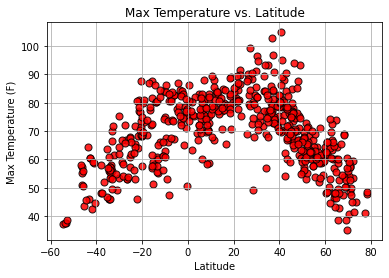

In [12]:
# using plt.scatter
# x and y axis
x_lat = clean_df['lat']
max_temp = clean_df['max temperature']
plt.scatter(x_lat, max_temp, marker='o', facecolors='Red', edgecolors='black', s=50, alpha=0.85)
plt.grid()
plt.title(f'Max Temperature vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

## Latitude vs. Humidity Plot

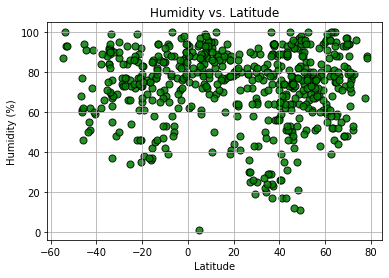

In [13]:
y_hum = clean_df['humidity']
plt.scatter(x_lat, y_hum, marker='o', facecolors='Green', edgecolors='black', s=50, alpha=0.85)
plt.title('Humidity vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

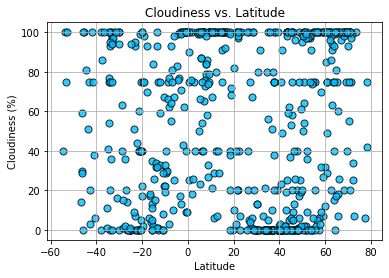

In [14]:
y_cloud = clean_df['cloudiness']
plt.scatter(x_lat, y_cloud, marker='o', facecolors="deepskyblue", edgecolors='black', s=50, alpha=0.8)
plt.grid()
plt.title('Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

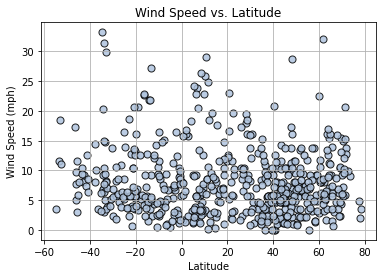

In [15]:
y_wind = clean_df['wind speed']
plt.scatter(x_lat, y_wind, marker='o', facecolors="lightsteelblue", edgecolors='black', s=50, alpha=0.85)
plt.grid()
plt.title('Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

## Linear Regression

In [16]:
# Creating seperate dataframes for Northern and Southern Hemisphere
# using .loc
# print results
n_hemisphere_data = clean_df.loc[clean_df['lat'] >= 0]
print('Northern Hemisphere')
print('----------------------------')
print(n_hemisphere_data.head())
print(n_hemisphere_data.count())
print('---------------------------')
print('Southern Hemisphere')
print('-----------------------------')
s_hemisphere_data = clean_df.loc[clean_df['lat'] < 0]
print(s_hemisphere_data.head())
print(s_hemisphere_data.count())

Northern Hemisphere
----------------------------
         city        lat         lng  max temperature  humidity  cloudiness  \
3      ca mau   9.179222  105.145791            83.16      77.0       100.0   
4       sayat  45.827315    3.051024            73.42      46.0         0.0   
6   jamestown  37.210443  -76.773893            84.20      89.0         0.0   
9       sohag  26.547748   31.699263            82.67      30.0         5.0   
10   souillac  44.898017    1.469430            69.66      50.0        53.0   

    wind speed country          date  
3         7.07      VN  1.659577e+09  
4         1.14      FR  1.659577e+09  
6         3.44      US  1.659577e+09  
9         8.57      EG  1.659577e+09  
10        4.59      FR  1.659577e+09  
city               395
lat                395
lng                395
max temperature    395
humidity           395
cloudiness         395
wind speed         395
country            395
date               395
dtype: int64
----------------------

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Northern Hemisphere - Max Temp vs. Latitude Linear Regression
Linear Regression Equation: y = -0.39x + 86.12
Correlation: -0.6420797623616936


Text(10, 40, 'y = -0.39x + 86.12')

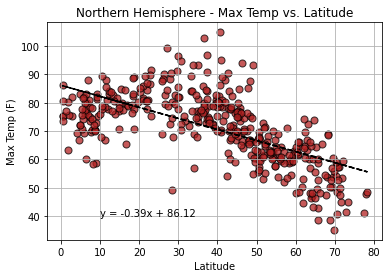

In [17]:
# values for regression
print('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# x value (north hemisphere latitudes)
x_nh_lat = n_hemisphere_data['lat']
# y value (north hemispher max temps)
y_nh_maxtemp = n_hemisphere_data['max temperature']

# regression values (slope, intercept, rvalue, pvalue, stderr)
nh_mt_slope, nh_mt_int, nh_mt_r, nh_mt_p, nh_mt_stderr = linregress(x_nh_lat, y_nh_maxtemp)
nh_mt_fit = nh_mt_slope * x_nh_lat + nh_mt_int
nh_mt_eq = f'y = {round(nh_mt_slope,2)}x + {round(nh_mt_int,2)}'
print(f'Linear Regression Equation: {nh_mt_eq}')
nh_mt_correlation = st.pearsonr(x_nh_lat,y_nh_maxtemp)
print(f'Correlation: {nh_mt_correlation[0]}')

# plotting

# scatter
plt.scatter(x_nh_lat, y_nh_maxtemp, marker='o', facecolors='firebrick', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# plotting equation line
plt.plot(x_nh_lat, nh_mt_fit, 'k--')
plt.annotate(nh_mt_eq, (10,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Linear Regression Equation: y = 0.63x + 79.03
Correlation: 0.6894415600194802


Text(-20, 40, 'y = 0.63x + 79.03')

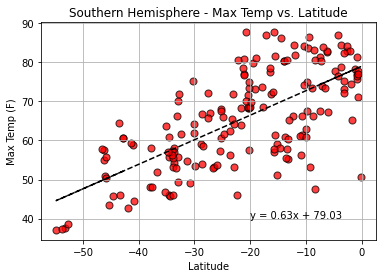

In [18]:
print('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
# values
# x - south hem latitude
x_sh_lat = s_hemisphere_data['lat']

# y - south hem max temp
y_sh_maxtemp = s_hemisphere_data['max temperature']

# regression values
sh_mt_slope, sh_mt_int, sh_mt_r, sh_mt_p, sh_mt_stderr = linregress(x_sh_lat, y_sh_maxtemp)
# fit
sh_mt_fit = sh_mt_slope * x_sh_lat + sh_mt_int

# equation
sh_mt_eq = f'y = {round(sh_mt_slope,2)}x + {round(sh_mt_int,2)}'
print(f'Linear Regression Equation: {sh_mt_eq}')

# correlation
sh_mt_correlation = st.pearsonr(x_sh_lat,y_sh_maxtemp)
print(f'Correlation: {sh_mt_correlation[0]}')

# Plotting
# scatter
plt.scatter(x_sh_lat, y_sh_maxtemp, marker='o', facecolors='red', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# regression line
plt.plot(x_sh_lat, sh_mt_fit, 'k--')
plt.annotate(sh_mt_eq, (-20,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Linear Regression Equation: y = -0.06x + 74.81
Correlation: -0.06406354780690346


Text(60, 20, 'y = -0.06x + 74.81')

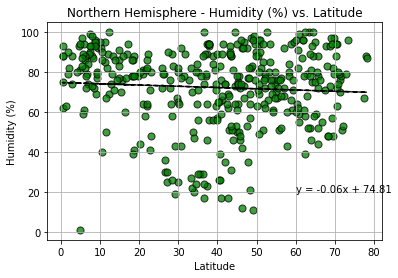

In [19]:
print('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# values
# x already x nh lat
# y - north hem humidity
y_nh_humidity = n_hemisphere_data['humidity']

# regression values
nh_h_slope, nh_h_int, nh_h_r, nh_h_p, nh_h_stderr = linregress(x_nh_lat, y_nh_humidity)
# fit
nh_h_fit = nh_h_slope * x_nh_lat + nh_h_int

# equation
nh_h_eq = f'y = {round(nh_h_slope,2)}x + {round(nh_h_int,2)}'
print(f'Linear Regression Equation: {nh_h_eq}')

# correlation
nh_h_corr = st.pearsonr(x_nh_lat,y_nh_humidity)
print(f'Correlation: {nh_h_corr[0]}')

# plotting
# scatter
plt.scatter(x_nh_lat, y_nh_humidity, marker='o', facecolors='green', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# regression line
plt.plot(x_nh_lat, nh_h_fit, 'k--')
plt.annotate(nh_h_eq, (60,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Linear Regression Equation: y = 0.02x + 74.5
Correlation: 0.02075087113344301


Text(-50, 40, 'y = 0.02x + 74.5')

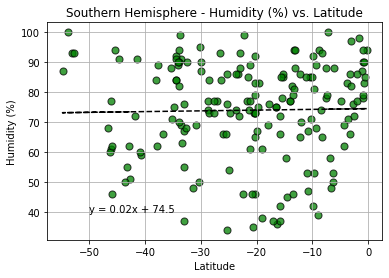

In [20]:
print('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# values
# already have x sh lat
# y - south hem humidity
y_sh_humidity = s_hemisphere_data['humidity']

# regression values
sh_h_slope, sh_h_int, sh_h_r, sh_h_p, sh_h_stderr = linregress(x_sh_lat, y_sh_humidity)
# fit
sh_h_fit = sh_h_slope * x_sh_lat + sh_h_int

# equation
sh_h_eq = f'y = {round(sh_h_slope,2)}x + {round(sh_h_int,2)}'
print(f'Linear Regression Equation: {sh_h_eq}')

# correlation
sh_h_corr = st.pearsonr(x_sh_lat,y_sh_humidity)
print(f'Correlation: {sh_h_corr[0]}')

# plotting
# scatter
plt.scatter(x_sh_lat, y_sh_humidity, marker='o', facecolors='green', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# plot regression
plt.plot(x_sh_lat, sh_h_fit, 'k--')
plt.annotate(sh_h_eq, (-50,40))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Northern Hemisphere - Cloudiness (%) vs. Latitude
Linear Regression Equation: y = -0.1x + 56.0
Correlation: -0.050220965856134475


Text(0, 45, 'y = -0.1x + 56.0')

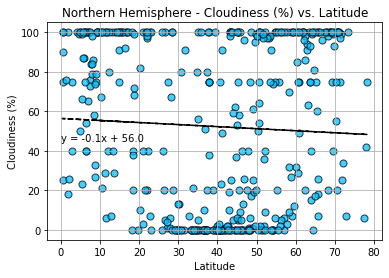

In [21]:
print('Northern Hemisphere - Cloudiness (%) vs. Latitude')

# values
# x nh lat
# y - north hem cloudiness
y_nh_cloud = n_hemisphere_data['cloudiness']

# regess values
nh_c_slope, nh_c_int, nh_c_r, nh_c_p, nh_c_stderr = linregress(x_nh_lat, y_nh_cloud)
# fit
nh_c_fit = nh_c_slope * x_nh_lat + nh_c_int

# equation
nh_c_eq = f'y = {round(nh_c_slope,2)}x + {round(nh_c_int)}'
print(f'Linear Regression Equation: {nh_c_eq}')

# correlation
nh_c_corr = st.pearsonr(x_nh_lat,y_nh_cloud)
print(f'Correlation: {nh_c_corr[0]}')

# plotting
# scatter
plt.scatter(x_nh_lat, y_nh_cloud, marker='o', facecolors='deepskyblue', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# regrss line
plt.plot(x_nh_lat, nh_c_fit, "k--")
plt.annotate(nh_c_eq, (0,45))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Southern Hemisphere - Cloudiness (%) vs. Latitude
Linear Regression Equation: y = -0.04x + 48.0
Correlation: -0.01304882203833997


Text(-50, 45, 'y = -0.04x + 48.0')

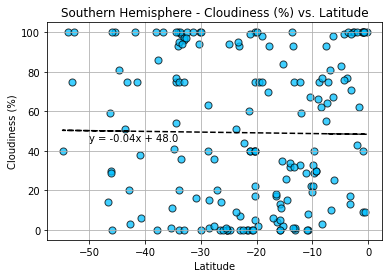

In [24]:
print('Southern Hemisphere - Cloudiness (%) vs. Latitude')

# values
# x sh lat
# y - south hem cloudiness
y_sh_cloud = s_hemisphere_data['cloudiness']

# regress values
sh_c_slope, sh_c_int, sh_c_r, sh_c_p, sh_c_stderr = linregress(x_sh_lat, y_sh_cloud)
# fit
sh_c_fit = sh_c_slope * x_sh_lat + sh_c_int

# equation
sh_c_eq = f'y = {round(sh_c_slope,2)}x + {round(sh_c_int)}'
print(f'Linear Regression Equation: {sh_c_eq}')

# correlation
sh_c_corr = st.pearsonr(x_sh_lat,y_sh_cloud)
print(f'Correlation: {sh_c_corr[0]}')

# plotting
# scatter
plt.scatter(x_sh_lat, y_sh_cloud, marker='o', facecolors='deepskyblue', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# regress line
plt.plot(x_sh_lat, sh_c_fit, 'k--')
plt.annotate(sh_c_eq, (-50, 45))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Linear Regression Equation: y = -0.01x + 8.25
Correlaton: -0.05500860400964842


Text(10, 31, 'y = -0.01x + 8.25')

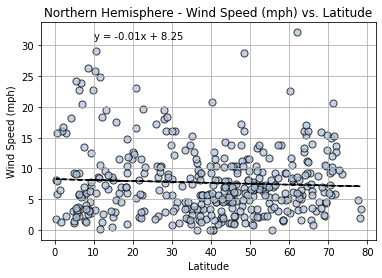

In [28]:
print('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# values
# x nh lat
# y - north hem wind speed
y_nh_wind = n_hemisphere_data['wind speed']

# regress values
nh_ws_slope, nh_ws_int, nh_ws_r, nh_ws_p, nh_ws_stderr = linregress(x_nh_lat, y_nh_wind)
# fit
nh_ws_fit = nh_ws_slope * x_nh_lat + nh_ws_int

# equation
nh_ws_eq = f'y = {round(nh_ws_slope,2)}x + {round(nh_ws_int,2)}'
print(f'Linear Regression Equation: {nh_ws_eq}')

# correlation
nh_ws_corr = st.pearsonr(x_nh_lat,y_nh_wind)
print(f'Correlaton: {nh_ws_corr[0]}')

# plotting
# scatter
plt.scatter(x_nh_lat, y_nh_wind, marker='o', facecolors='lightsteelblue', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# regress line
plt.plot(x_nh_lat, nh_ws_fit, 'k--')
plt.annotate(nh_ws_eq, (10, 31))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Linear Regression Equation: y = -0.07x + 6.87
Correlation: -0.16071466096483658


Text(-55, 15, 'y = -0.07x + 6.87')

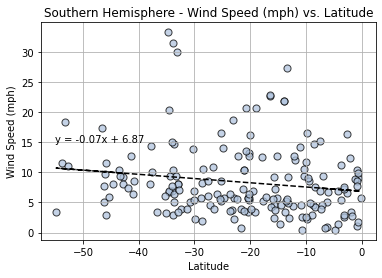

In [31]:
print('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# values
# x sh lat
# y - south hem wind speed
y_sh_wind = s_hemisphere_data['wind speed']

# regress values
sh_ws_slope, sh_ws_int, sh_ws_r, sh_ws_p, sh_ws_stderr = linregress(x_sh_lat, y_sh_wind)
# fit
sh_ws_fit = sh_ws_slope * x_sh_lat + sh_ws_int

# equation
sh_ws_eq = f'y = {round(sh_ws_slope,2)}x + {round(sh_ws_int,2)}'
print(f'Linear Regression Equation: {sh_ws_eq}')

# correlation
sh_ws_corr = st.pearsonr(x_sh_lat, y_sh_wind)
print(f'Correlation: {sh_ws_corr[0]}')

# plotting
# scatter
plt.scatter(x_sh_lat, y_sh_wind, marker='o', facecolors='lightsteelblue', edgecolors='black', s=50, alpha=0.75)
plt.grid()
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# regress line
plt.plot(x_sh_lat, sh_ws_fit, 'k--')
plt.annotate(sh_ws_eq, (-55, 15))

In [1]:
# Data Analysis

# 1 - Max temperature is higher the closer the city is to the equator

# 2 - The Northern Hemisphere has higher humidity than the southern hemisphere

# 3 - Wind Speeds are lower in the souther hemisphere